#A - Objective and Overview

## **Objective**

Use unsupervised learning to cluster similar running backs together, in an attempt to improve fantasy football draft decisions

## **Feature Description:**
**DP**: draft pick where player was selected in the NFL draft

**Rush_ATT_per_GP**: rushing attempts per game

**Rush_Yards_per_GP**: rushing yards per game

**Rush_TDs_per_GP**: rushing touchdownds per game

**Yards_per_Carry**: rushing yards per carry (rushing attempt)

**REC_per_GP**: receptions per game

**REC_Yards_per_GP**: receiving yards per game

**REC_TDs_per_GP**: receiving touchdowns per game

**Yards_per_REC**: yards gained per receptions

**Touches_per_GP**: touches per game

**PPR_per_GP**: average fantasy points per game (PPR style scoring) in college

**Combined_RUSH_MS**: a metric designed to represent a player's production in their team's rushing offense.

**Combined_REC_MS**: a metric designed to represent a player's receiving production in their college offense

**RUSH_CD**: a metric that equally weighs the career last and career best seasons in terms of market share of team rushing yards and rushing touchdowns.

**REC_CD**: represents the player's percentage of their team's offense in respect to the team's yardage and touchdowns

**RB_BOA**: the age in a season a running back first achieves a greater than 15% scrimmage dominator rating.

**BMI**: body mass index (BMI) recorded during the NFL Combine. Formula = Mass (lb) / Height (in)^2 x 703

**forty_time**: time it takes a player to complete a sprint measuring 40 yards. Times not recorded at the NFL combine are adjusted by adding .05 seconds to the player time.

**Agility_Score**: a metric intended to measure a player's lateral agility and quickness

**Broad**: measures the player's ability to jump horizontally from a balanced stance

**three_cone**: measures a player's ability to change directions as they run around 3 cones placed in an L-shape

**Power_5_Conference**: indicates whether the player played for a school belonging in one of the 'Power 5 Conferences' (Big 10, Big 12, ACC, SEC, or PAC-12) (0 = No, 1 = Yes)

**Early_Declare**: indicates whether a player declared for the NFL draft before his senior year season (0 = No, 1 = Yes)

## **Recognition:**
Credit to FF_Spaceman for the dataset. Data source: https://www.patreon.com/posts/post-draft-65853161*

*dataset has been updated with RB class of 2022 NFL stats

#B - Setup

##1.0 Import Libraries and Read Dataset

In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np

from sklearn.model_selection import KFold
from keras.wrappers.scikit_learn import KerasRegressor

In [232]:
df = pd.read_csv('2023_RB_Database.csv', header = 2)

##2.0 Preview Data

In [233]:
df.head(50)

,Player,School,Conf,DOB,DR,DP,Draft Year,Draft Age,NCAA Szns,18,...,40 time.1,Bench.1,Vertical.1,Broad.1,Shuttle.1,3 Cone.1,Top 5 RB,Top 12 RB,Top 24 RB,AVG PPG YR 1-3
0,Bijan Robinson,Texas,Big 12,1/30/2002,1,8,2023,21,3,9.0,...,-,-,-,-,-,-,-,-,-,-
1,Calvin Tyler,Utah ST,MWC,9/23/1998,UDFA,UDFA,2023,24,5,4.0,...,-,-,-,-,-,-,-,-,-,-
2,Camerun Peoples,Appalachian ST,Sun Belt,9/14/1999,UDFA,UDFA,2023,23,5,3.0,...,-,-,-,-,-,-,-,-,-,-
3,Chase Brown,Illinois,Big Ten,11/25/2000,5,163,2023,22,5,2.0,...,-,-,-,-,-,-,-,-,-,-
4,Chris Rodriguez,Kentucky,SEC,9/26/2000,6,193,2023,22,5,9.0,...,-,-,-,-,-,-,-,-,-,-
5,Chris Smith,Louisiana,Sun Belt,9/8/1999,UDFA,UDFA,2023,23,4,NaN,...,-,-,-,-,-,-,-,-,-,-
6,Christopher Brooks,Brigham Young,Ind,1/11/2000,UDFA,UDFA,2023,23,5,10.0,...,-,-,-,-,-,-,-,-,-,-
7,Deneric Prince,Tulsa,American,4/11/2000,UDFA,UDFA,2023,23,4,NaN,...,-,-,-,-,-,-,-,-,-,-
8,Deuce Vaughn,Kansas ST,Big 12,11/2/2001,6,212,2023,21,3,10.0,...,-,-,-,-,-,-,-,-,-,-
9,Devon Achane,Texas A&M,SEC,10/13/2001,3,84,2023,21,3,6.0,...,-,-,-,-,-,-,-,-,-,-


In [234]:
df.describe()

,Draft Year,Draft Age,NCAA Szns,18,19,20,21,22,23,18.1,...,Return Yards.3,Return Yards/GP.2,Return TDs.3,Return TDs/GP.2,Total Touches.3,Total Touches/GP.2,Total Yards.3,Total Yards/GP.2,Total TDs.3,Total TDs/GP.2
count,643.000000,643.000000,643.000000,293.000000,483.000000,569.000000,509.000000,289.000000,82.000000,293.000000,...,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000
mean,2014.228616,22.354588,3.475894,9.627986,10.221532,10.753954,11.031434,11.010381,11.085366,84.180887,...,95.091900,8.572741,0.099840,0.009237,156.706231,13.946885,987.833956,87.735670,8.434579,0.740343
std,5.993947,0.926550,0.820660,3.296143,3.338228,3.001043,2.705891,2.784486,2.794179,68.605568,...,153.866139,13.279857,0.278073,0.027629,62.477656,4.879359,409.381082,31.570896,4.413451,0.366510
min,2003.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,-2.000000,-0.100000,0.000000,0.000000,7.000000,1.200000,34.000000,5.600000,0.000000,0.000000
25%,2009.000000,22.000000,3.000000,8.000000,9.000000,10.000000,10.000000,10.000000,10.000000,29.000000,...,0.000000,0.000000,0.000000,0.000000,112.850000,10.600000,680.075000,64.250000,5.000000,0.500000
50%,2015.000000,22.000000,4.000000,11.000000,11.000000,12.000000,12.000000,12.000000,12.000000,67.000000,...,22.000000,2.150000,0.000000,0.000000,151.550000,13.600000,950.150000,86.700000,8.000000,0.700000
75%,2020.000000,23.000000,4.000000,12.000000,13.000000,13.000000,13.000000,13.000000,13.000000,123.000000,...,131.750000,12.375000,0.000000,0.000000,197.600000,17.200000,1249.150000,107.650000,11.000000,0.900000
max,2023.000000,25.000000,6.000000,15.000000,15.000000,15.000000,15.000000,16.000000,15.000000,299.000000,...,886.000000,74.500000,2.000000,0.350000,325.000000,28.300000,2329.000000,188.200000,31.000000,2.800000


In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643 entries, 0 to 642
Columns: 577 entries, Player to AVG PPG YR 1-3
dtypes: float64(373), int64(4), object(200)
memory usage: 2.8+ MB


##3.0 Data Preprocessing, Cleaning, and Feature Engineering

###3.1 Remove Undrafted Free Agents (UDFA) from Dataset

In [236]:
#Remove undrafted players from dataset
df = df[df.DR != 'UDFA']
df = df[df.DP != 'UDFA']

In [237]:
#df = df.rename(columns={"Draft Year": "Draft_Year", "Draft Age": "Draft_Age", "NCAA Szns": "NCAA_Szns", "RushATTGP": "Rush_ATT_per_GP", "Draft Year": "Draft_Year", "Draft Age": "Draft_Age", "Draft Year": "Draft_Year", "Draft Age": "Draft_Age", "Draft Year": "Draft_Year", "Draft Age": "Draft_Age"})



#'Rush_ATT_per_GP', 'Rush_Yards_per_GP', 'Rush_TDs_per_GP', 'Yards_per_Carry', 'REC_per_GP', 'REC_Yards_per_GP', 'REC_TDs_per_GP', 'Yards_per_REC', 'Touches_per_GP', 'PPR_per_GP', 'Combined_RUSH_MS', 'Combined_REC_MS', 'Yds_per_Carry_Over_TM_AVG', 'Yards_per_TM_Rush_ATT', 'RUSH_CD', 'REC_CD', 'RB_BOA', 'forty_time', 'Agility_Score', 'three_cone', 'Top_5_RB', 'Top_12_RB', 'Top_24_RB', 'AVG_PPG_YR_1_3']

###3.2 Select Columns of Interest

In [238]:
draft_df = df[['Player', 
               'Conf',
               'DR', 
               'DP', 
               'Draft Year', 
               'Draft Age', 
               'NCAA Szns',
               'GP',
               'Rush ATT',
               'Rush Yards',
               'Rush TDs',
               'REC',
               'REC Yards',
               'REC TDs',
               'Touches',
               'Yards/ Carry',
               'Yards/ REC',
               'PPR Points',
               'YDs/Carry Over TM AVG',
               'Combined RUSH MS',
               'Combined REC MS',
               'Yards/TM Rush ATT',
               'RUSH CD',
               'REC CD',
               'RB BOA',
               'BMI',
               '40 time',
               'Agility Score',
               'Broad',
               'WaSS',
               'RAS',
               'Top 5 RB',
               'Top 12 RB',
               'Top 24 RB',
               'AVG PPG YR 1-3'
]]

In [239]:
draft_df.head()

,Player,Conf,DR,DP,Draft Year,Draft Age,NCAA Szns,GP,Rush ATT,Rush Yards,...,BMI,40 time,Agility Score,Broad,WaSS,RAS,Top 5 RB,Top 12 RB,Top 24 RB,AVG PPG YR 1-3
0,Bijan Robinson,Big 12,1,8,2023,21,3,31.0,539.0,3410.0,...,29.99,4.46,-,124,108.67,9.81,-,-,-,-
3,Chase Brown,Big Ten,5,163,2023,22,5,45.0,676.0,3558.0,...,30.42,4.43,-,127,108.53,9.75,-,-,-,-
4,Chris Rodriguez,SEC,6,193,2023,22,5,40.0,592.0,3643.0,...,29.43,-,-,-,-,-,-,-,-,-
8,Deuce Vaughn,Big 12,6,212,2023,21,3,37.0,651.0,3604.0,...,29.79,-,-,-,-,-,-,-,-,-
9,Devon Achane,SEC,3,84,2023,21,3,28.0,369.0,2376.0,...,28.17,4.32,-,-,107.96,6.84,-,-,-,-


###3.3 Rename Columns

In [240]:
draft_df = draft_df.rename(columns={"Draft Year": "Draft_Year", 
                                    "Draft Age": "Draft_Age", 
                                    "NCAA Szns": "NCAA_Szns", 
                                    "Rush ATT": "Rush_ATT", 
                                    "Rush Yards": "Rush_Yards", 
                                    "Rush TDs": "Rush_TDs", 
                                    "REC Yards": "REC_Yards", 
                                    "REC TDs": "REC_TDs", 
                                    "Yards/ Carry": "Yards_per_Carry", 
                                    "Yards/ REC": "Yards_per_REC", 
                                    "PPR Points": "PPR_Points", 
                                    "YDs/Carry Over TM AVG": "Yards_per_Carry_Over_TM_AVG", 
                                    "Combined RUSH MS": "Combined_RUSH_MS", 
                                    "Combined REC MS": "Combined_REC_MS", 
                                    "Yards/TM Rush ATT": "Yards_per_TM_Rush_ATT", 
                                    "RUSH CD": "RUSH_CD", 
                                    "REC CD": "REC_CD", 
                                    "RB BOA": "RB_BOA", 
                                    "40 time": "forty_time", 
                                    "Agility Score": "Agility_Score", 
                                    "Top 5 RB": "Top_5_RB", 
                                    "Top 12 RB": "Top_12_RB", 
                                    "Top 24 RB": "Top_24_RB", 
                                    "AVG PPG YR 1-3": "AVG_PPG_YR_1_3"})                 

###3.3 Replace and Convert Non-numeric Data to Numeric

In [241]:
#replace '-' with 24, indicating they did not breakout in college (assuming college years age 18-23)
draft_df['RB_BOA'] = draft_df['RB_BOA'].replace('-',24)

#Replace non-numeric values
draft_df['BMI'] = draft_df['BMI'].replace('-',np.nan);
draft_df['forty_time'] = draft_df['forty_time'].replace('-',np.nan);
draft_df['Agility_Score'] = draft_df['Agility_Score'].replace('-',np.nan);
draft_df['Broad'] = draft_df['Broad'].replace('-',np.nan);
draft_df['WaSS'] = draft_df['WaSS'].replace('-',np.nan);
draft_df['RAS'] = draft_df['RAS'].replace('-',np.nan);
draft_df['AVG_PPG_YR_1_3'] = draft_df['AVG_PPG_YR_1_3'].replace('-',0.0);
draft_df['Yards_per_REC'] = draft_df['Yards_per_REC'].replace('-',0.0)
draft_df['Top_5_RB'] = draft_df['Top_5_RB'].replace('-',0)
draft_df['Top_12_RB'] = draft_df['Top_12_RB'].replace('-',0)
draft_df['Top_24_RB'] = draft_df['Top_24_RB'].replace('-',0)

#convert data types to float
draft_df["DR"] = draft_df.DR.astype(float)
draft_df["DP"] = draft_df.DP.astype(float)
draft_df["RB_BOA"] = draft_df.RB_BOA.astype(float)
draft_df["BMI"] = draft_df.BMI.astype(float)
draft_df["Combined_RUSH_MS"] = draft_df.Combined_RUSH_MS.str.replace(r'%', r'0').astype('float') / 100.0
draft_df["Combined_REC_MS"] = draft_df.Combined_REC_MS.str.replace(r'%', r'0').astype('float') / 100.0
draft_df["RUSH_CD"] = draft_df.RUSH_CD.str.replace(r'%', r'0').astype('float') / 100.0
draft_df["REC_CD"] = draft_df.REC_CD.str.replace(r'%', r'0').astype('float') / 100.0
draft_df["forty_time"] = draft_df.forty_time.astype(float)
draft_df["Agility_Score"] = draft_df.Agility_Score.astype(float)
draft_df["AVG_PPG_YR_1_3"] = draft_df.AVG_PPG_YR_1_3.astype(float)
draft_df["Yards_per_REC"] = draft_df.Yards_per_REC.astype(float)
draft_df["Broad"] = draft_df.Broad.astype(float)
draft_df['WaSS'] = draft_df['WaSS'].astype(float)
draft_df['RAS'] = draft_df['RAS'].astype(float)
draft_df["Top_5_RB"] = draft_df.Top_5_RB.astype(float)
draft_df["Top_12_RB"] = draft_df.Top_12_RB.astype(float)
draft_df["Top_24_RB"] = draft_df.Top_24_RB.astype(float)

#Replace NaN with median
draft_df['BMI'] = draft_df['BMI'].fillna(draft_df['BMI'].median())
draft_df['forty_time'] = draft_df['forty_time'].fillna(draft_df['forty_time'].median())
draft_df['Agility_Score'] = draft_df['Agility_Score'].fillna(draft_df['Agility_Score'].median())
draft_df['Broad'] = draft_df['Broad'].fillna(draft_df['Broad'].median())
draft_df['WaSS'] = draft_df['WaSS'].fillna(draft_df['WaSS'].median())
draft_df['RAS'] = draft_df['RAS'].fillna(draft_df['RAS'].median())


###3.4 Feature Engineering

In [242]:
#Create Power 5 Conference column based on college Conference column
draft_df['Power_5_Conference'] = np.nan
draft_df['Power_5_Conference'] = np.where((draft_df.Conf == 'ACC') | (draft_df.Conf == 'Big Ten') | (draft_df.Conf == 'Big 12') | (draft_df.Conf == 'Pac-12') | (draft_df.Conf == 'SEC'),1, 0)

#Create Early Declare column based on # of NCAA Seasons column
draft_df['Early_Declare'] = np.nan
draft_df['Early_Declare'] = np.where((draft_df.NCAA_Szns <= 3),1, 0)

#Create per game stats
draft_df['Rush_ATT_per_Game'] = np.nan
draft_df['Rush_ATT_per_Game'] = draft_df['Rush_ATT']/draft_df['GP']

draft_df['Rush_Yards_per_Game'] = np.nan
draft_df['Rush_Yards_per_Game'] = draft_df['Rush_Yards']/draft_df['GP']

draft_df['Rush_TDs_per_Game'] = np.nan
draft_df['Rush_TDs_per_Game'] = draft_df['Rush_TDs']/draft_df['GP']

draft_df['REC_per_Game'] = np.nan
draft_df['REC_per_Game'] = draft_df['REC']/draft_df['GP']

draft_df['REC_Yards_per_Game'] = np.nan
draft_df['REC_Yards_per_Game'] = draft_df['REC_Yards']/draft_df['GP']

draft_df['REC_TDs_per_Game'] = np.nan
draft_df['REC_TDs_per_Game'] = draft_df['REC_TDs']/draft_df['GP']

draft_df['Touches_per_Game'] = np.nan
draft_df['Touches_per_Game'] = draft_df['Touches']/draft_df['GP']

draft_df['PPR_Points_per_Game'] = np.nan
draft_df['PPR_Points_per_Game'] = draft_df['PPR_Points']/draft_df['GP']

#drop columns
draft_df = draft_df.drop(['Conf','NCAA_Szns', 'Rush_ATT', 'Rush_Yards', 'Rush_TDs', 'REC', 'REC_Yards', 'REC_TDs', 'Touches', 'PPR_Points', 'GP'],axis = 1)

In [243]:
#Move AVG_PPG_YR_1_3 column to end of dataframe
df1 = draft_df.pop('AVG_PPG_YR_1_3')
draft_df['AVG_PPG_YR_1_3']=df1 

In [244]:
draft_df.head()

,Player,DR,DP,Draft_Year,Draft_Age,Yards_per_Carry,Yards_per_REC,Yards_per_Carry_Over_TM_AVG,Combined_RUSH_MS,Combined_REC_MS,...,Early_Declare,Rush_ATT_per_Game,Rush_Yards_per_Game,Rush_TDs_per_Game,REC_per_Game,REC_Yards_per_Game,REC_TDs_per_Game,Touches_per_Game,PPR_Points_per_Game,AVG_PPG_YR_1_3
0,Bijan Robinson,1.0,8.0,2023,21,6.3,13.4,2.9,0.6333,0.1235,...,1,17.387097,110.000000,1.064516,1.935484,25.967742,0.258065,19.322581,23.467742,0.0
3,Chase Brown,5.0,163.0,2023,22,5.3,9.3,2.2,0.6579,0.1436,...,0,15.022222,79.066667,0.400000,1.066667,9.911111,0.066667,16.088889,12.764444,0.0
4,Chris Rodriguez,6.0,193.0,2023,22,6.2,5.8,1.9,0.6325,0.0729,...,0,14.800000,91.075000,0.825000,0.500000,2.900000,0.075000,15.300000,15.297500,0.0
8,Deuce Vaughn,6.0,212.0,2023,21,5.5,11.0,1.1,0.6537,0.2332,...,1,17.594595,97.405405,0.918919,3.135135,34.594595,0.243243,20.729730,23.308108,0.0
9,Devon Achane,3.0,84.0,2023,21,6.4,8.5,3.0,0.6578,0.1206,...,1,13.178571,84.857143,0.750000,2.321429,19.785714,0.178571,15.500000,18.785714,0.0


In [245]:
draft_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 642
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Player                       394 non-null    object 
 1   DR                           394 non-null    float64
 2   DP                           394 non-null    float64
 3   Draft_Year                   394 non-null    int64  
 4   Draft_Age                    394 non-null    int64  
 5   Yards_per_Carry              394 non-null    float64
 6   Yards_per_REC                394 non-null    float64
 7   Yards_per_Carry_Over_TM_AVG  394 non-null    float64
 8   Combined_RUSH_MS             394 non-null    float64
 9   Combined_REC_MS              394 non-null    float64
 10  Yards_per_TM_Rush_ATT        394 non-null    float64
 11  RUSH_CD                      394 non-null    float64
 12  REC_CD                       394 non-null    float64
 13  RB_BOA              

#C - Exploratory Data Analysis (EDA)

[Text(0.5, 1.0, 'Average PPG by Draft Round')]

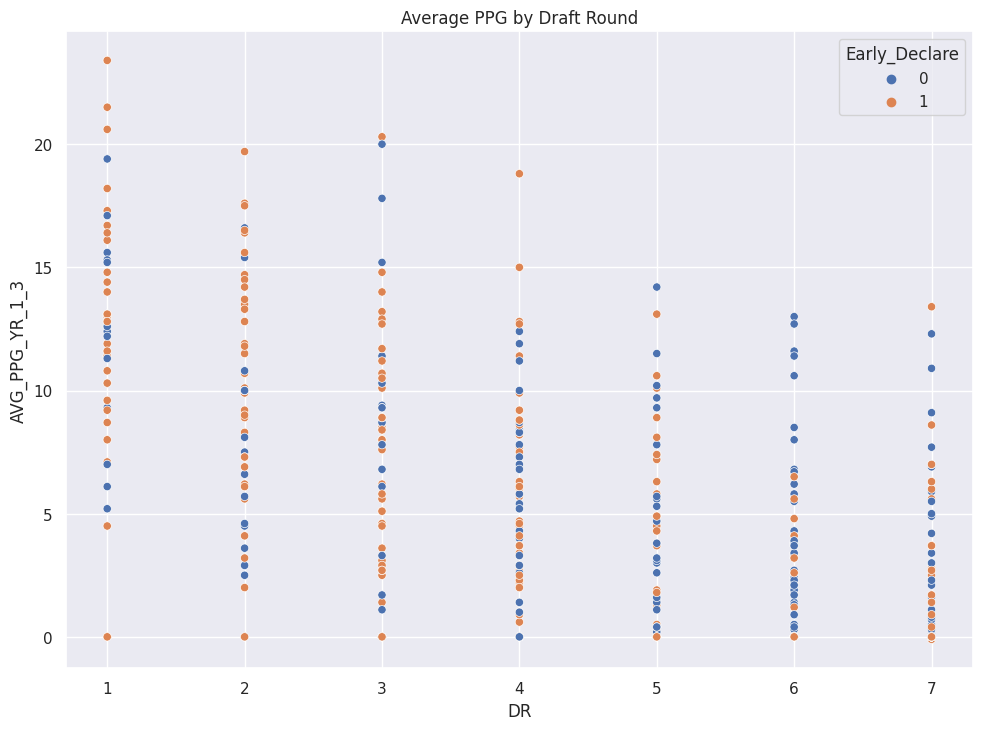

In [246]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=draft_df, x='DR', y="AVG_PPG_YR_1_3", hue = 'Early_Declare').set(title = 'Average PPG by Draft Round')

[Text(0.5, 1.0, 'Average PPG by Draft Round')]

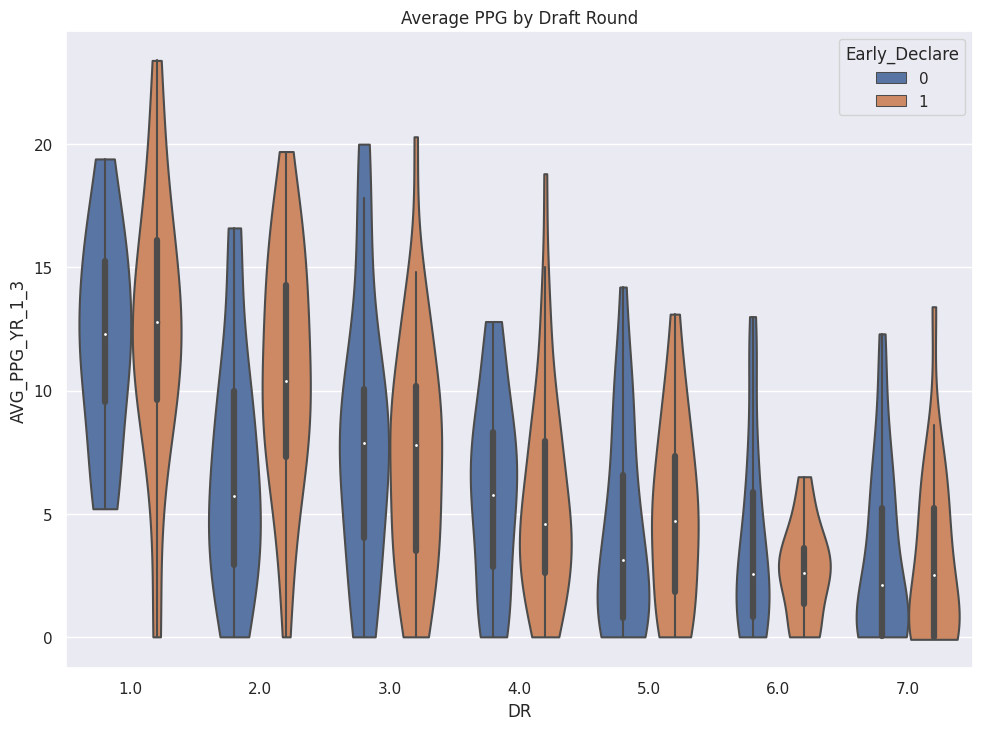

In [247]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.violinplot(data=draft_df, x='DR', y="AVG_PPG_YR_1_3", hue = 'Early_Declare', cut=0).set(title = 'Average PPG by Draft Round')

[Text(0.5, 1.0, 'Average PPG by Draft Pick')]

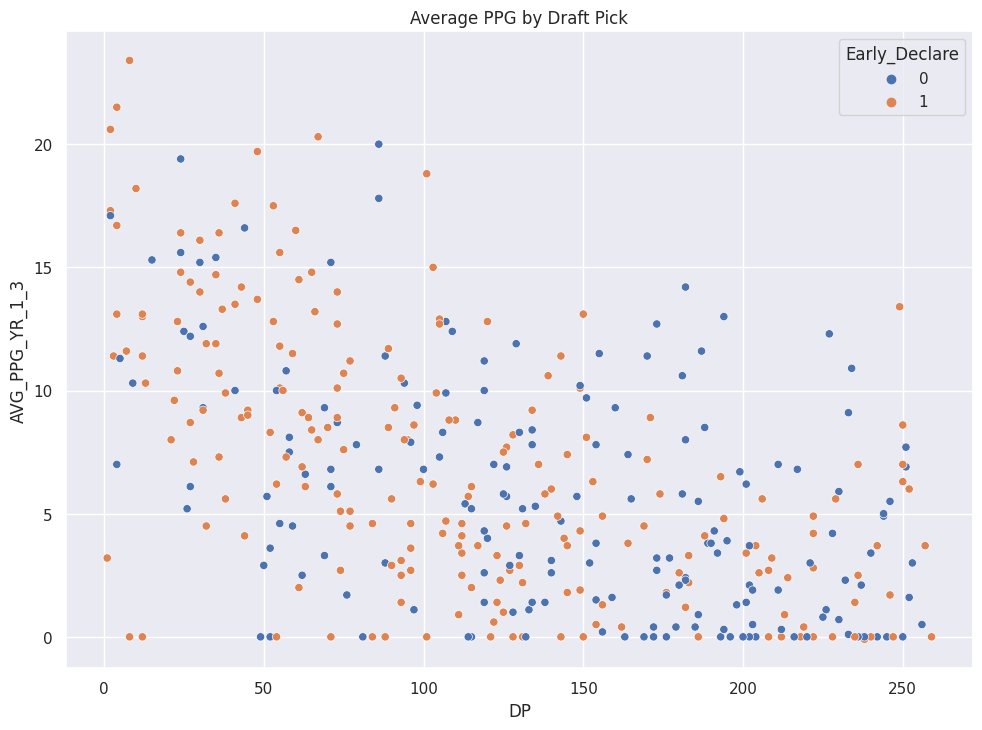

In [248]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=draft_df, x='DP', y="AVG_PPG_YR_1_3", hue='Early_Declare').set(title = 'Average PPG by Draft Pick')

[Text(0.5, 1.0, 'Average PPG by Age in Draft Year')]

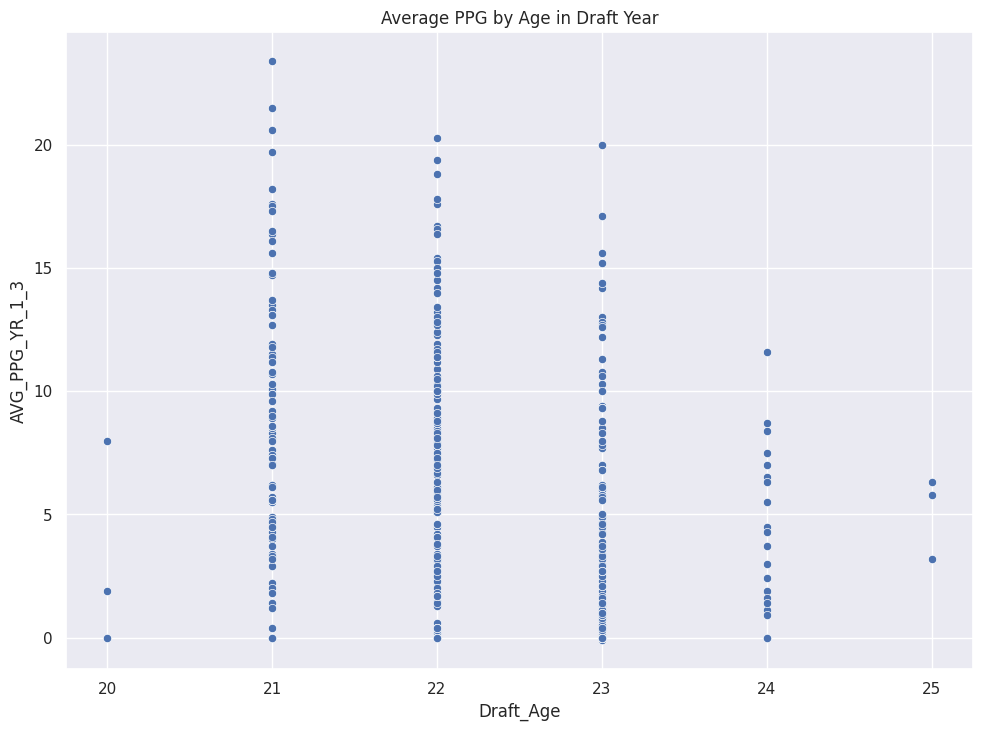

In [249]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=draft_df, x='Draft_Age', y="AVG_PPG_YR_1_3").set(title = 'Average PPG by Age in Draft Year')

[Text(0.5, 1.0, 'Average PPG by Age in Draft Year')]

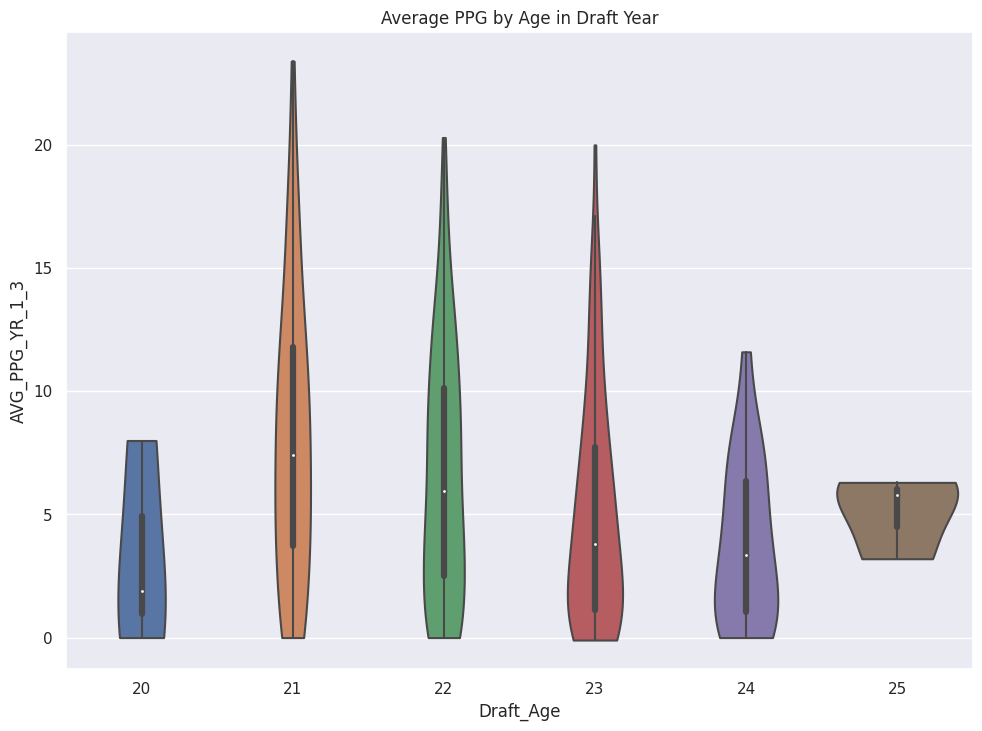

In [250]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.violinplot(data=draft_df, x='Draft_Age', y="AVG_PPG_YR_1_3", cut=0).set(title = 'Average PPG by Age in Draft Year')

[Text(0.5, 1.0, 'Average PPG by Early Declare Status')]

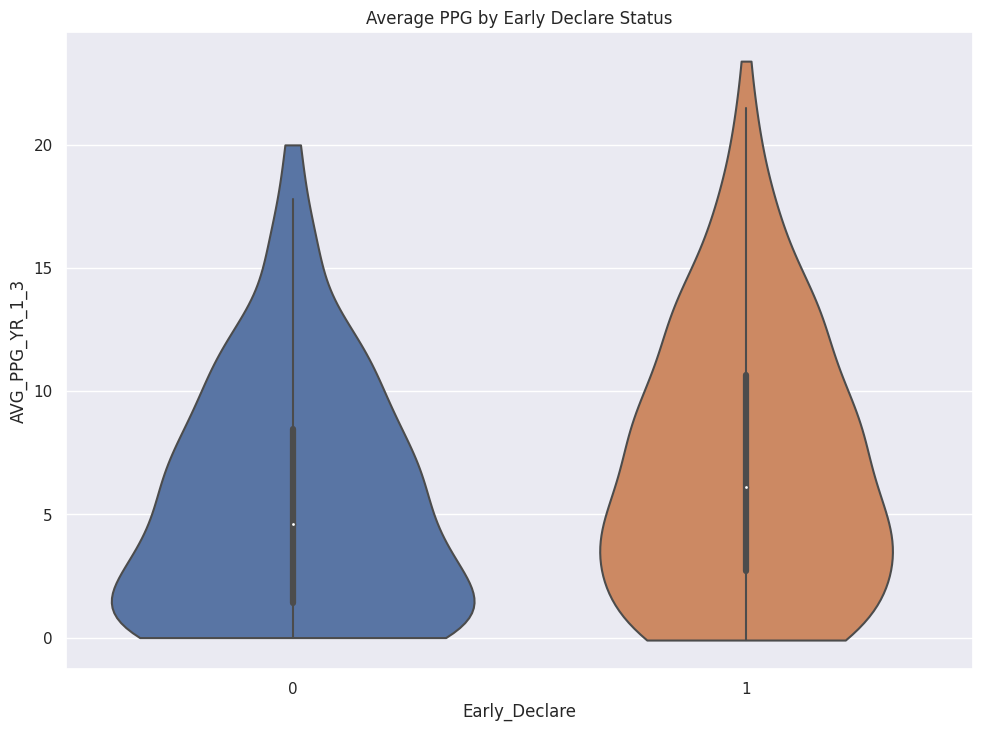

In [251]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.violinplot(data=draft_df, x='Early_Declare', y="AVG_PPG_YR_1_3", cut=0).set(title = 'Average PPG by Early Declare Status')

[Text(0.5, 1.0, 'Average PPG by BMI')]

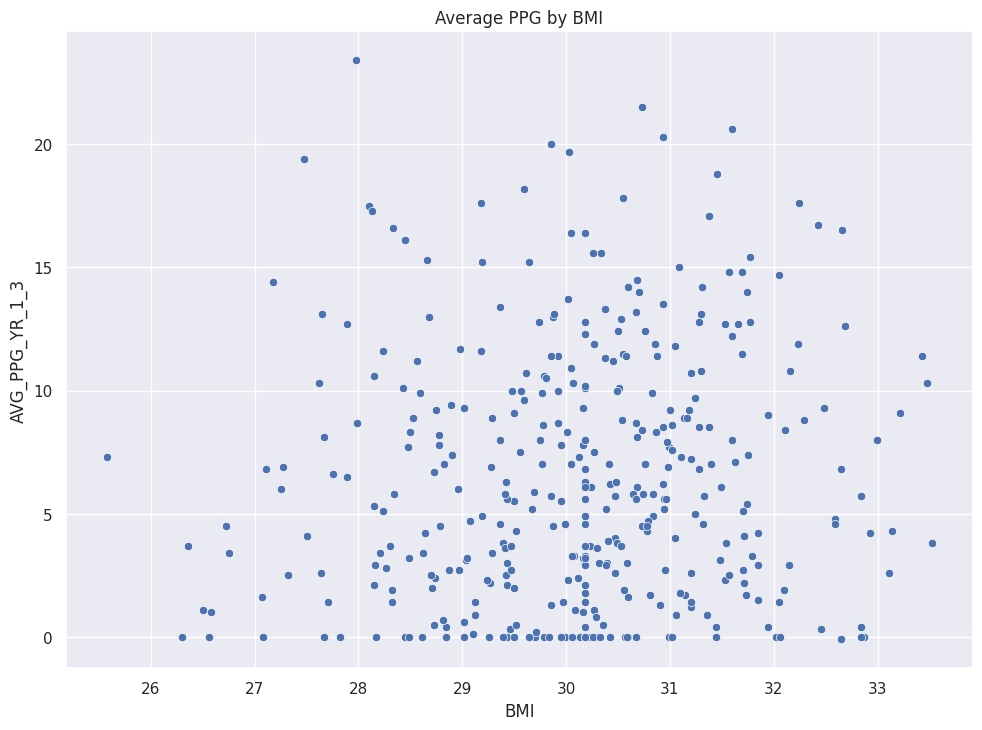

In [252]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=draft_df, x='BMI', y="AVG_PPG_YR_1_3").set(title = 'Average PPG by BMI')

[Text(0.5, 1.0, 'Average PPG by Combined Rushing Market Share')]

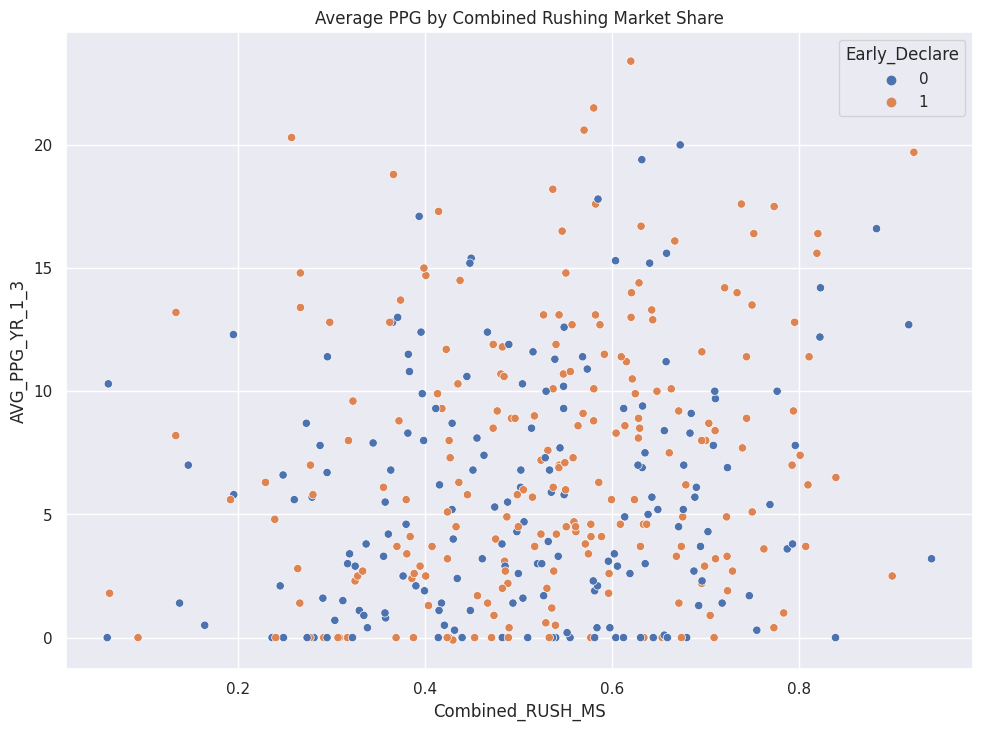

In [253]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=draft_df, x='Combined_RUSH_MS', y="AVG_PPG_YR_1_3", hue = 'Early_Declare').set(title = 'Average PPG by Combined Rushing Market Share')

[Text(0.5, 1.0, 'Average PPG by College Dominator Rating')]

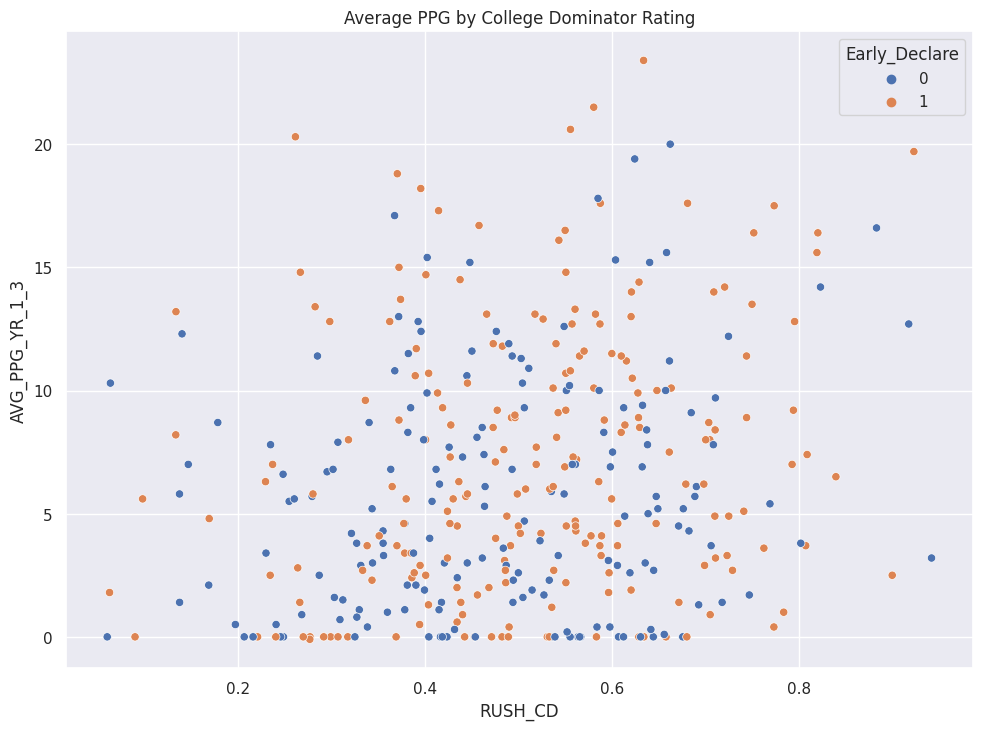

In [254]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=draft_df, x='RUSH_CD', y="AVG_PPG_YR_1_3", hue = 'Early_Declare').set(title = 'Average PPG by College Dominator Rating')

[Text(0.5, 1.0, 'Average PPG by RB Breakout Age')]

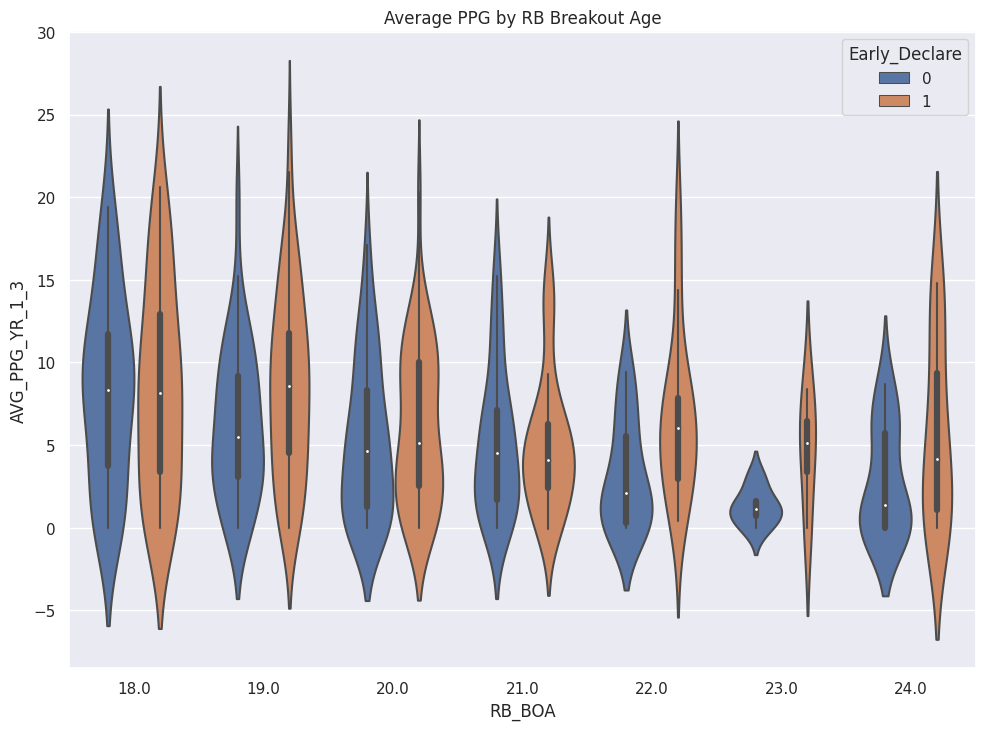

In [255]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.violinplot(data=draft_df, x='RB_BOA', y="AVG_PPG_YR_1_3", hue = 'Early_Declare').set(title = 'Average PPG by RB Breakout Age')

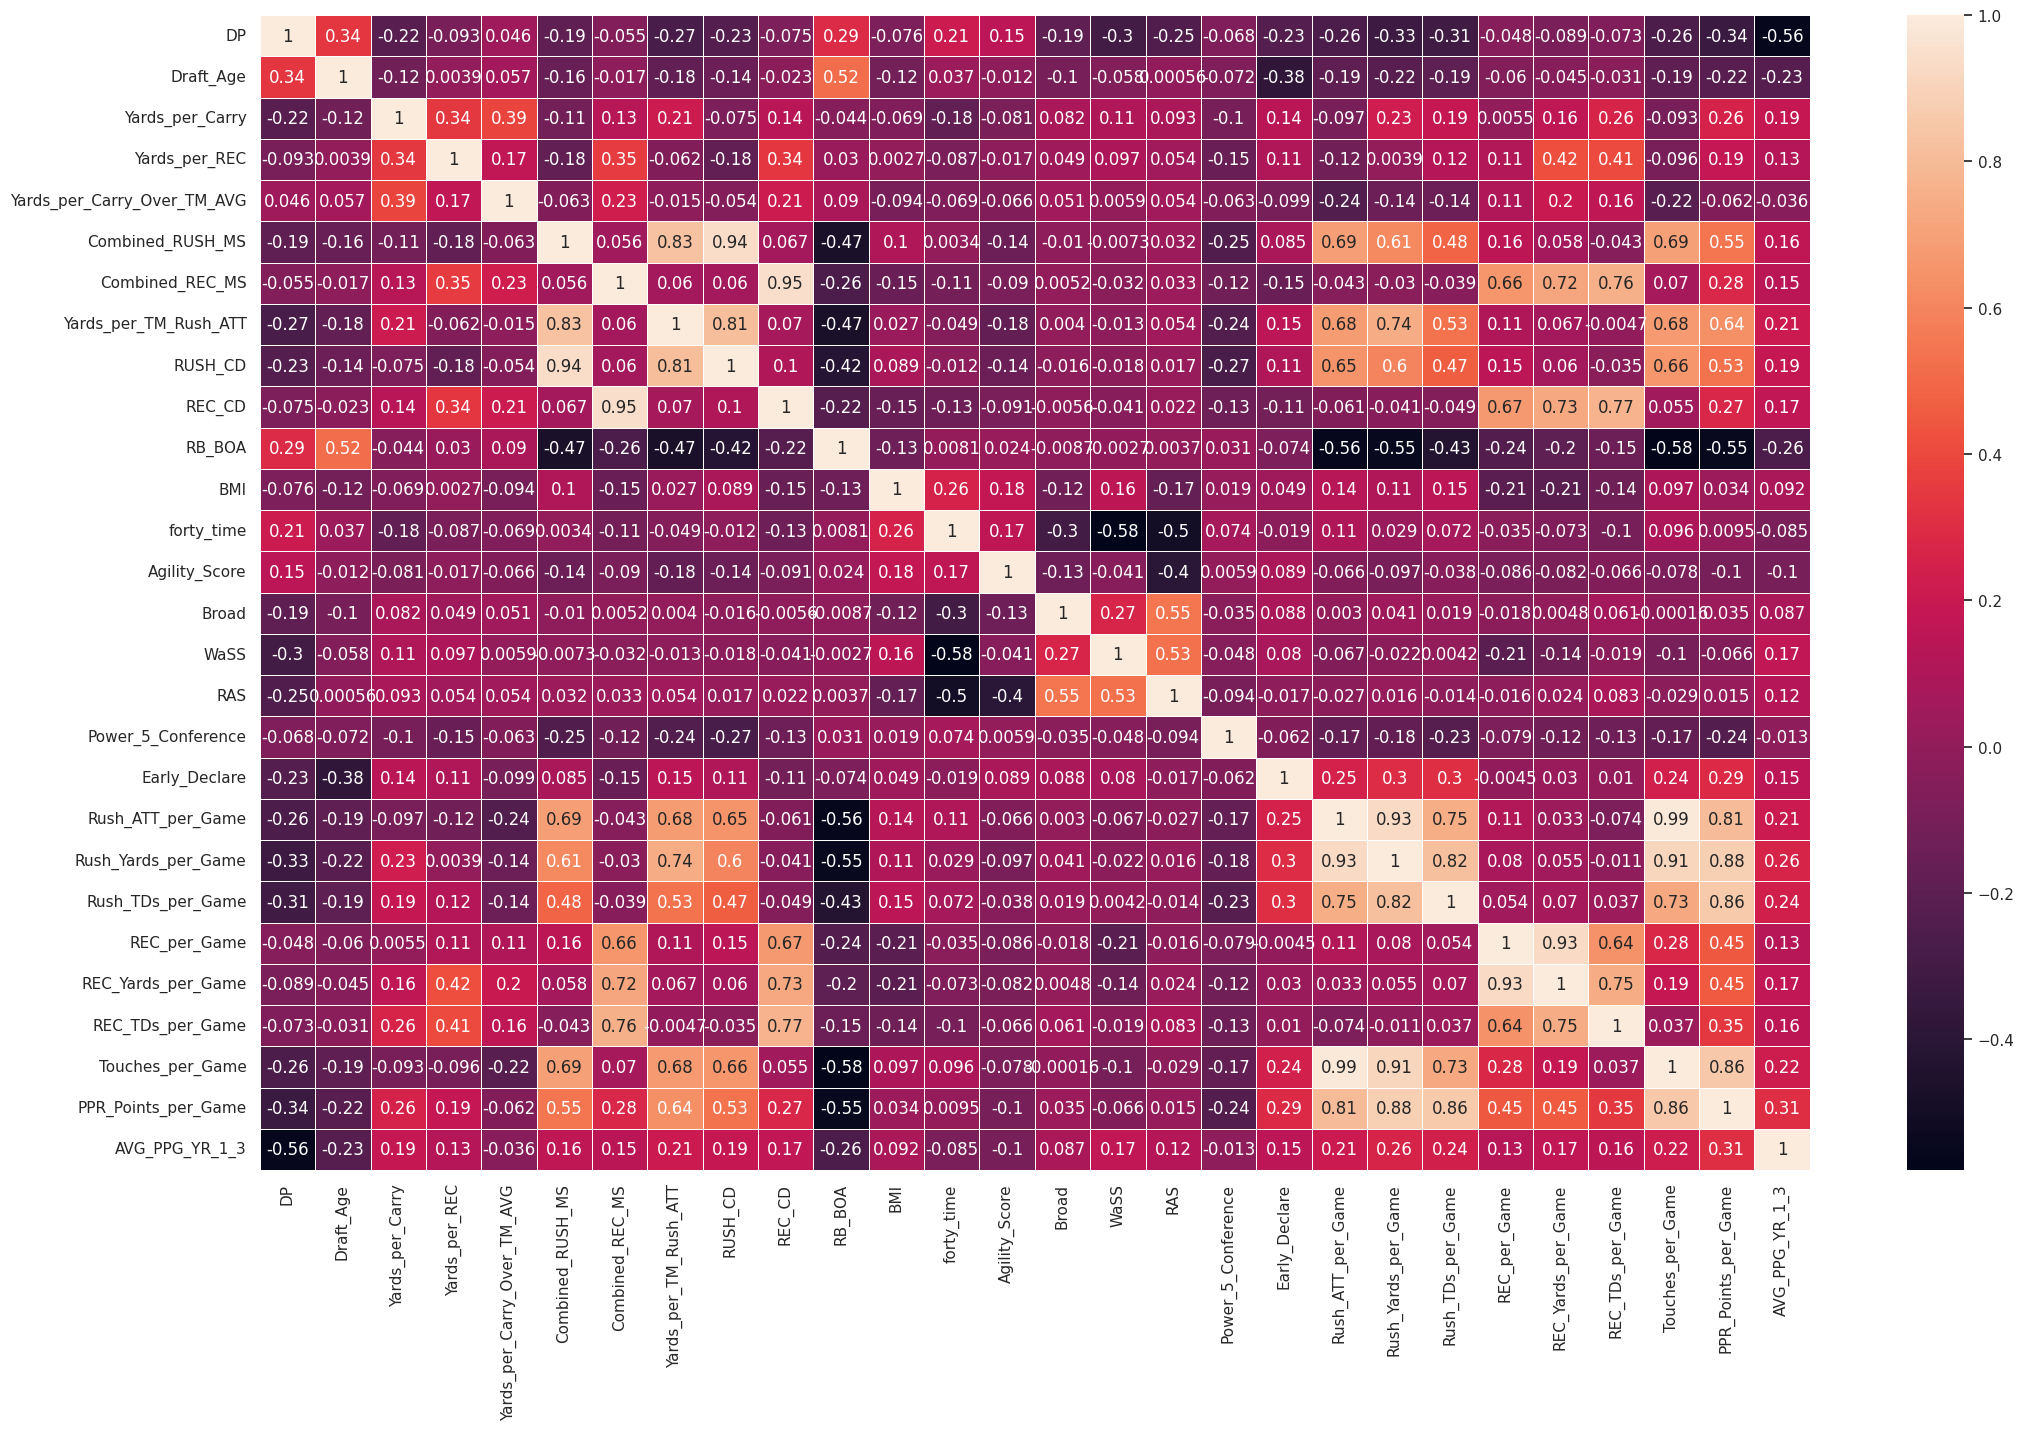

In [256]:
draft_df_corr_mat = draft_df.drop(['Player','Draft_Year','DR', 'Top_5_RB', 'Top_12_RB', 'Top_24_RB' ],axis = 1)
f,ax = plt.subplots(figsize=(25, 15))
corrMatrix = draft_df_corr_mat.corr()
sns.heatmap(corrMatrix, annot=True,linewidths=.5,ax=ax)
plt.show()

##1.0 - EDA Conclusions

Conclusions:

*   Running backs drafted earlier in the NFL Draft have greater fantasy success
*   Early declares (player who declare they are entering the NFL Draft before their Senior year season) appear to have higher average points per game ceilings
*   No running back with a BMI less than 27.5 has averaged 15 points per game or more in their first 3 seasons
*   Running backs aged 24 or older when drafted have much lower average point per game
*   Running backs with younger breakout ages tended to have a higher average points per game, especially in cases of early declare vs non early declare
*   Average points per game tended to increase with an increase in running back dominator rating
*   Average points per game tended to increase with a younger breakout age
*   Average points per game tended to increase with an increase in combined rushing market share
*   The correlation matrix reveals the predictors with the strongest correlation to average points per game in seasons 1-3 are draft pick, average points per game in college, running back breakout age (RB_BOA), yards per team rush attempt, draft age, and rush yards per game.


#D - Train/Test Split

In [257]:
np.random.seed(10)

predictors = draft_df.drop(['AVG_PPG_YR_1_3','Player', 'Draft_Year','DR', 'Draft_Age', 'Top_5_RB','Top_12_RB','Top_24_RB'],axis = 1)

In [258]:
predictors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 642
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   DP                           394 non-null    float64
 1   Yards_per_Carry              394 non-null    float64
 2   Yards_per_REC                394 non-null    float64
 3   Yards_per_Carry_Over_TM_AVG  394 non-null    float64
 4   Combined_RUSH_MS             394 non-null    float64
 5   Combined_REC_MS              394 non-null    float64
 6   Yards_per_TM_Rush_ATT        394 non-null    float64
 7   RUSH_CD                      394 non-null    float64
 8   REC_CD                       394 non-null    float64
 9   RB_BOA                       394 non-null    float64
 10  BMI                          394 non-null    float64
 11  forty_time                   394 non-null    float64
 12  Agility_Score                394 non-null    float64
 13  Broad               

#E - Standardization

##1.0 Density Plots

###1.1 Density Plot of Inputs Before Standardization

Text(0.5, 1.0, 'Train Inputs Density Plot')

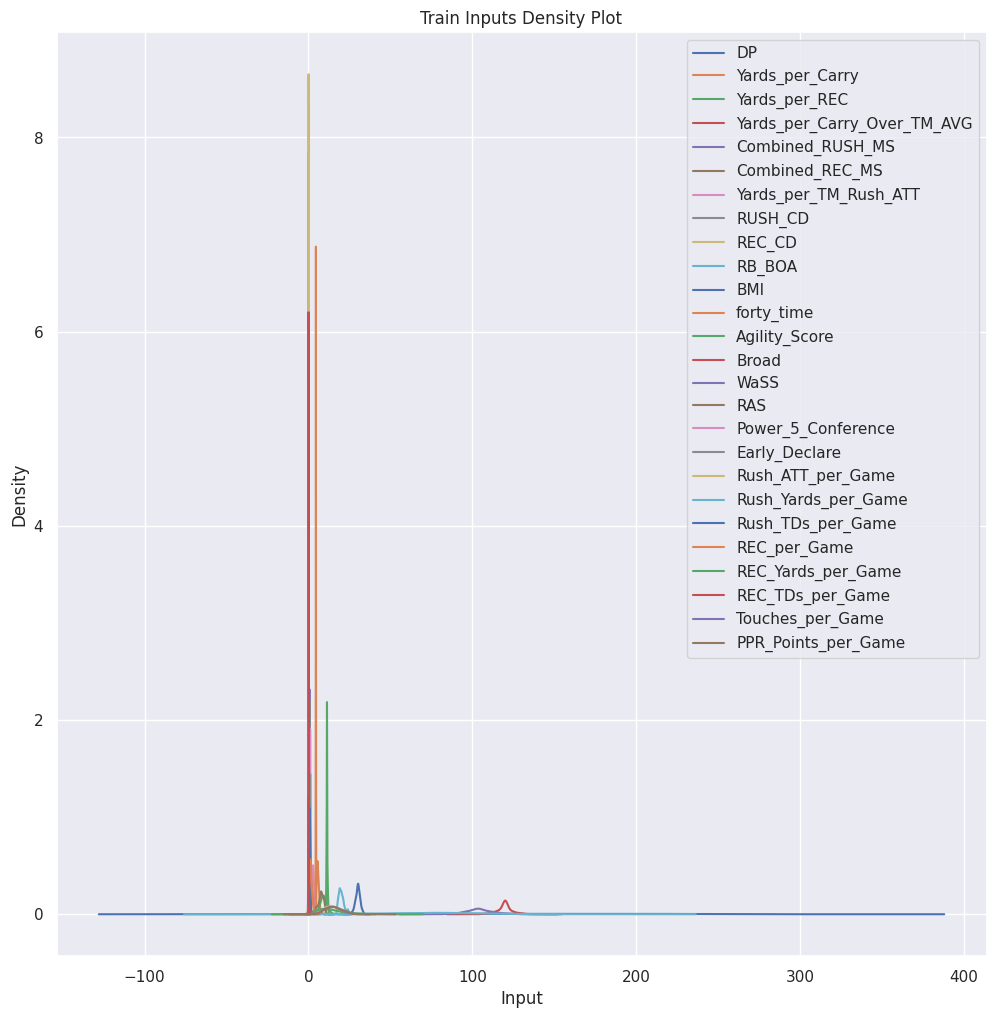

In [259]:
#density plot of inputs
predictors.plot.density(figsize = (12, 12))#,linewidth = 4)
plt.xlabel("Input")
plt.title("Train Inputs Density Plot")

###1.2 - Density Plot of Inputs Post Standardization

In [260]:
from sklearn.preprocessing import StandardScaler

# create scaler
scaler = StandardScaler()

# fit and transform
standard_predictors= scaler.fit_transform(predictors)
#standard_X_test = scaler.fit_transform(X_test)

standard_predictors_df = pd.DataFrame(standard_predictors)

Text(0.5, 1.0, 'Standardized Train Inputs Density Plot')

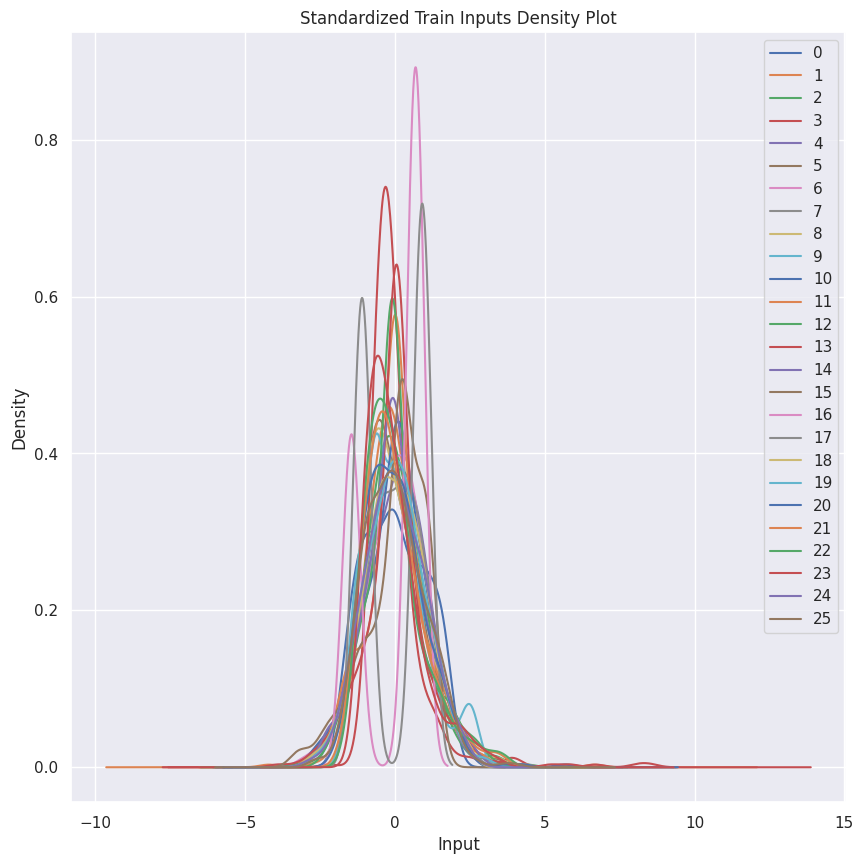

In [261]:
standard_predictors_df.plot.density(figsize = (10, 10))#,linewidth = 4)
plt.xlabel("Input")
plt.title("Standardized Train Inputs Density Plot")

#F - Clustering

##1.0 K-Means Clustering

In [262]:
# k-means clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot
# define the model
kmeans_model = KMeans(n_clusters=12) #12 used rule of thumb that states the square root of half the number of objects to use as k
# fit the model
kmeans_model.fit(predictors)
# assign a cluster to each example
kmeans_yhat = kmeans_model.predict(predictors)
# retrieve unique clusters
kmeans_clusters = unique(kmeans_yhat)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


##2.0 Cluster Analysis

In [263]:
#create dataframe
df_cluster = pd.DataFrame()
df_cluster['player'] =  draft_df['Player']
df_cluster['cluster'] = kmeans_yhat
df_cluster['average_PPG'] = draft_df['AVG_PPG_YR_1_3']
df_cluster['number_of_top_5_season'] = draft_df['Top_5_RB']
df_cluster['number_of_top_12_season'] = draft_df['Top_12_RB']
df_cluster['number_of_top_24_season'] = draft_df['Top_24_RB']

#determine if player had 1 top 5, top 12, and/or top 24 seasons
df_cluster['top_5_season'] = np.where((df_cluster.number_of_top_5_season >= 1),1, 0)
df_cluster['top_12_season'] = np.where((df_cluster.number_of_top_12_season >= 1),1, 0)
df_cluster['top_24_season'] = np.where((df_cluster.number_of_top_24_season >= 1),1, 0)

#drop unwanted columns
df_cluster = df_cluster.drop(['number_of_top_5_season','number_of_top_12_season','number_of_top_24_season'], axis = 1)

#sort dataframe by average ppg
#df_cluster.sort_values(by=['average_PPG'],ascending=False, inplace = True)
df_cluster.head(60)


,player,cluster,average_PPG,top_5_season,top_12_season,top_24_season
0,Bijan Robinson,4,0.0,0,0,0
3,Chase Brown,1,0.0,0,0,0
4,Chris Rodriguez,1,0.0,0,0,0
8,Deuce Vaughn,3,0.0,0,0,0
9,Devon Achane,11,0.0,0,0,0
10,DeWayne McBride,3,0.0,0,0,0
13,Eric Gray,1,0.0,0,0,0
14,Evan Hull,1,0.0,0,0,0
16,Israel Abanikanda,9,0.0,0,0,0
17,Jahmyr Gibbs,0,0.0,0,0,0


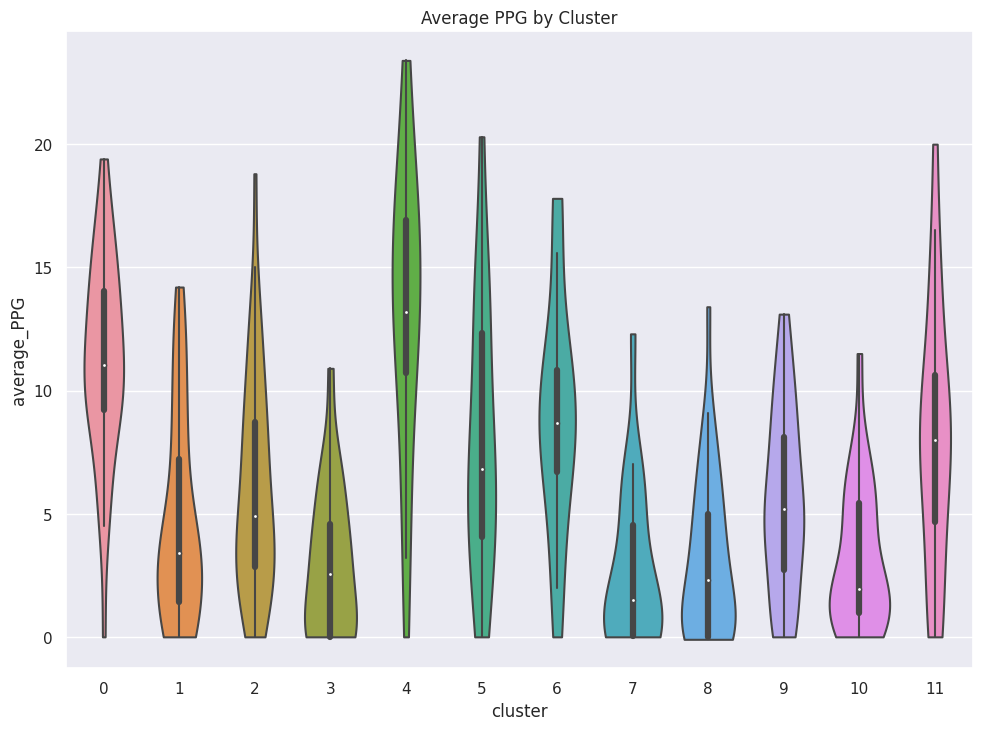

In [264]:
sns.set(rc={'figure.figsize':(11.7,8.27)});
sns.violinplot(data=df_cluster, x='cluster', y="average_PPG", cut=0).set(title = 'Average PPG by Cluster');

###2.1 Cluster Metrics

In [265]:
#function that determines percentage of players in each cluster that averaged 10+ppg in their first three seasons
def above_10_percentages_func(clusters):
  for index, cluster in enumerate(clusters):
    above_10_count = len(df_cluster[(df_cluster['average_PPG']>=10) & (df_cluster['cluster']==cluster)])
    count_in_cluster = len(df_cluster[(df_cluster['cluster']==cluster)])
    above_10_percentage = round((above_10_count/count_in_cluster)*100,2)
    above_10_percentages.append(above_10_percentage)
    count_in_clusters.append(count_in_cluster)
  return above_10_percentages
  return count_in_clusters

In [266]:
#function that determines percentage of players in each cluster that had at least one top 5, 12, or 24 season
def top_seasons_func(clusters):
  for index, cluster in enumerate(clusters):
    top_5_count = len(df_cluster[(df_cluster['top_5_season']>=1) & (df_cluster['cluster']==cluster)])
    top_12_count = len(df_cluster[(df_cluster['top_12_season']>=1) & (df_cluster['cluster']==cluster)])
    top_24_count = len(df_cluster[(df_cluster['top_24_season']>=1) & (df_cluster['cluster']==cluster)])
    count_in_cluster = len(df_cluster[(df_cluster['cluster']==cluster)])
    top_5_percentage = round((top_5_count/count_in_cluster)*100,2)
    top_12_percentage = round((top_12_count/count_in_cluster)*100,2)
    top_24_percentage = round((top_24_count/count_in_cluster)*100,2)
    top_5_percentages.append(top_5_percentage)
    top_12_percentages.append(top_12_percentage)
    top_24_percentages.append(top_24_percentage)
  return top_5_percentages
  return top_12_percentages
  return top_24_percentages

In [267]:
#set clusters equal to # of clusters defined in kmeans model
clusters = np.arange(0,kmeans_model.n_clusters).tolist()

#create lists for storing cluster metrics
above_10_percentages = []
count_in_clusters = []
top_5_percentages = []
top_12_percentages = []
top_24_percentages = []

#get cluster metrics
above_10_percentages_func(clusters);
top_seasons_func(clusters);

In [268]:
#create cluster comparison dataframe
df_hit_rate = pd.DataFrame()
df_hit_rate['cluster'] = clusters
df_hit_rate['player_count'] = count_in_clusters
df_hit_rate['percent_of_players_that_avg_10+_ppg'] = above_10_percentages
df_hit_rate['percent_of_players_that_had_top_5_season'] = top_5_percentages
df_hit_rate['percent_of_players_that_had_top_12_season'] = top_12_percentages
df_hit_rate['percent_of_players_that_had_top_24_season'] = top_24_percentages
df_hit_rate.sort_values(by=['percent_of_players_that_avg_10+_ppg'],ascending=False, inplace = True)
df_hit_rate.head(12)

,cluster,player_count,percent_of_players_that_avg_10+_ppg,percent_of_players_that_had_top_5_season,percent_of_players_that_had_top_12_season,percent_of_players_that_had_top_24_season
4,4,24,75.00,50.00,66.67,75.00
0,0,36,63.89,22.22,38.89,77.78
6,6,20,40.00,15.00,25.00,50.00
11,11,42,33.33,16.67,26.19,40.48
5,5,19,31.58,15.79,21.05,47.37
2,2,48,16.67,4.17,12.50,22.92
9,9,57,15.79,3.51,10.53,26.32
1,1,41,14.63,2.44,7.32,17.07
3,3,22,4.55,0.00,4.55,9.09
7,7,22,4.55,4.55,4.55,13.64


###2.2 Cluster Conclusions

Observing the cluster dataframe, the highest scoring players fall into clusters 4, 0, 6, and 11. Cluster 4 is by far the best cluster, with 75% of the players averaging 10+ points per game over their first three seasons in the NFL. This cluster also has the highest hit rate for top 5, top 12, and top 24 fantasy finishes at the running back position, with 50% of players in the cluster having at least one top 5 scoring season, 66.67% with a top 12 season, and 75% with a top 24 season With high scoring running backs greatly contributing to overall fantasy team success, players in this cluster should be heavily considered when drafting players. After cluster 5 there is a steep dropoff in fantasy scoring. These players would be better targets for very late rounds as the clusters are much less likley to provide fantasy value.



#G - Save to .csv for Further Analysis in Visualization Software

In [269]:
#Create csv file to use in visualization software
#df_cluster.to_csv("RB_clusters.csv")